# House Prices: Advanced Regression Techniques
Playground for the [House Prices: Advanced Regression Techniques Kaggle Competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). Also my thoughts on how to tackle the problem.

Evaluation Metric: RMSE

## 1. Loading the libraries and data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Loading the data
train_df = pd.read_csv('./datasets/house_prices_train.csv')
test_df = pd.read_csv('./datasets/house_prices_test.csv') # for later use

In [3]:
# Displaying the head
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Let's see a scatter of the prices with respect of the lot area - simple, but just to get a feel for the data.

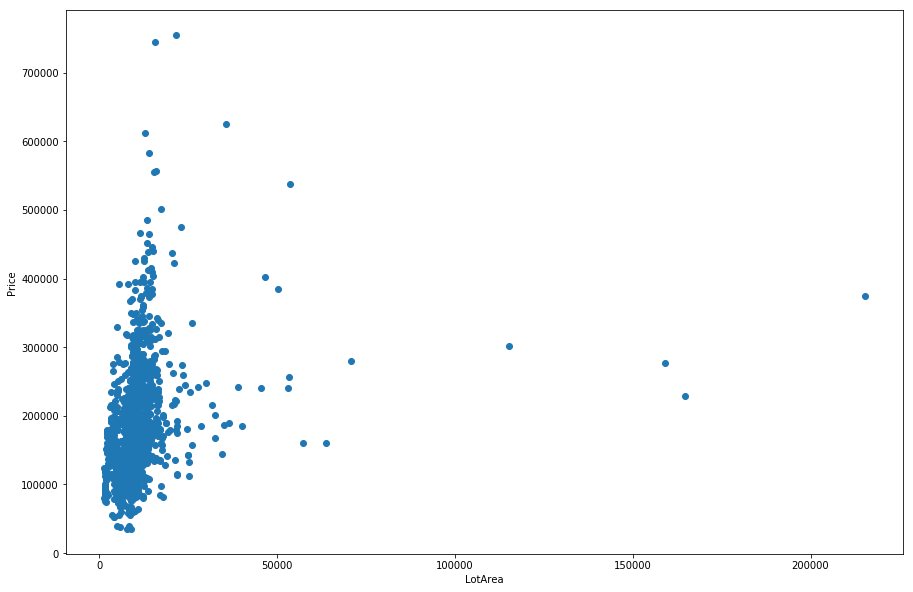

In [11]:
plt.subplots(figsize=(15,10))
plt.scatter(train_df['LotArea'].values, train_df['SalePrice'].values)
plt.xlabel('LotArea')
plt.ylabel('Price')
plt.show()

One would assume that there is a strong correlation between lotsize and price, but from the figure above it seems that this is not necessary the case.

Although some linear relationship does exist, there are various outliers.

## 2. EDA
Lots of things to do here. The basics revolve around a step process to do a number of things:
1. A basic summary of the data.
2. Check for missing data.
3. Gain insight into the data set by:  
    a. Univariate relations - check how each feature relates to the price.  
    b. Multivariate relations - check whether multiple features, as a group, have a relationship with the price.  
    c. Dimensionality reduction - Helps us understand the variance between features.  